In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv("vectorized.csv", index_col=0)

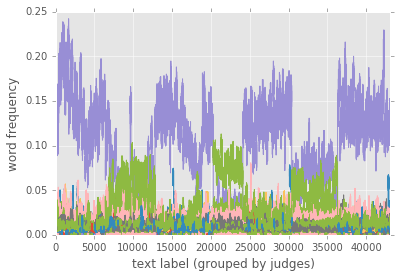

In [3]:
(data.iloc[:,2:]/3000).plot(legend = False)
plt.xlabel("text label (grouped by judges)")
plt.ylabel("word frequency")
plt.savefig("freq")

In [4]:
train_x = np.array(data.iloc[:,2:])
train_x = np.nan_to_num(train_x)
train_x = train_x/3000
train_y = np.array(data.iloc[:,0])

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf = RandomForestClassifier(n_estimators=200, n_jobs=2)

In [9]:
clf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
test = pd.read_csv("test_ds.csv", index_col=0)

In [30]:
#np.array(test.iloc[:,4:])/test["file_n"]
wc = np.array(test["total wc"])
temp = np.array(test.iloc[:,4:])
temp = np.nan_to_num(temp)
test_x = []
for i in range(wc.shape[0]):
    vec = temp[i]/wc[i]
    test_x.append(vec)
test_x = np.array(test_x) 
    